<a href="https://colab.research.google.com/github/bsibley2/Machine-learning-projects/blob/main/Sibley_text_data_(spam_filter)_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# We begin by importing as many relevant libraries and classes and functions from these libraries as 
# it is possible to envision the need for up front. Various other items will be imported as needed.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
%matplotlib inline

In [ ]:
# Before importing and looking at the data, we create a string containing all entries
# which will be considered missing values in the data set.
missing_values_string = [' ', '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND',
                         '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null']

In [ ]:
# We import the data set and have a look at the first five entries, labelling the "ham/spam"
# designation as the "Type", and the message itself as "Message".
data =df= pd.DataFrame(pd.read_csv('SMSSpamCollection.txt',delimiter="\t", na_values=missing_values_string, names= ['Type','Message']))
data.head()

,Type,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#We see how many entries there are and what the various data types are.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Type     5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# We look at the last five entries.
data.tail()

,Type,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [ ]:
# Here we just confirm the number of messages.
len(data)

5572

In [ ]:
# Here we see how many messages are marked as "ham".
len(data.Type[data.Type==0])

0

In [ ]:
# Here we see how many messages are marked as ""spam".
len(data.Type[data.Type==1])

0

In [ ]:
# We display the previous two values together. Clearly this data set is unbalanced.
data.Type.value_counts()

ham     4825
spam     747
Name: Type, dtype: int64

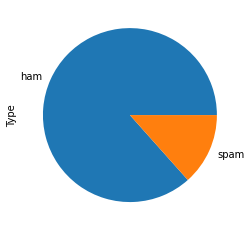

In [ ]:
# We make a pie chart demonstrating this.
data.Type.value_counts().plot(kind='pie');

In [ ]:
# We make a list giving all the frequencies of every word in the 
# union of all the documents ordered by decreasing frequency.
word_frequency_list=df.Message.str.split(expand=True).stack().value_counts()
word_frequency_list

to                       2145
you                      1626
I                        1469
a                        1337
the                      1207
                         ... 
inlude                      1
previews.                   1
Ambrith..madurai..met       1
arun                        1
Rofl.                       1
Length: 15691, dtype: int64

In [ ]:
# We transform the above into a Pandas series. There's probably
# some more elegant way to do all this in one step, but I'm failing to find it.
word_freqs = pd.Series(word_frequency_list).sort_values(ascending=False)
word_freqs

to               2145
you              1626
I                1469
a                1337
the              1207
                 ... 
lib                 1
Eatin               1
Hmmm.but            1
0871-872-9758       1
Rofl.               1
Length: 15691, dtype: int64

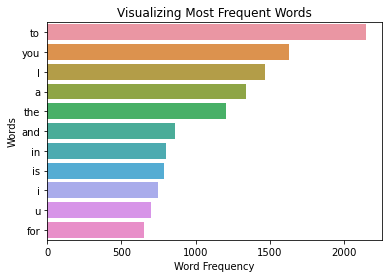

In [ ]:
# Here we display all the top frequencies that appear in a barplot.
top_freqs= word_freqs.take([0,1,2,3,4,5,6,7,8,9,10])

sns.barplot(x=top_freqs, y=top_freqs.index )

# Add labels to your graph
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title("Visualizing Most Frequent Words")
plt.show()

In [ ]:
# Now that we've had a basic look at the data we're going to start working with, and so 
# we'll need to vecotorise it. Here we start with a basic preprocessing step of converting to 
# lower case and eliminating special characters.
data.Message = data.Message.apply(lambda x: x.lower()) #lower cases
data.Message = data.Message.apply((lambda x: re.sub('[^a-zA-Z0-9\s]','',x))) 

In [ ]:
# We replace the different types with 0 and 1 respectively, so that the vecotorisor will be
# able to read the data.
df['Type']=df['Type'].replace('ham', 0)
df['Type']=df['Type'].replace('spam', 1)

In [ ]:
# We prepare to break our data set up into a train and test set.
text = data.Message
label = data.Type

In [ ]:
# Here we execute the train-test split of the data.
text_train, text_test, y_train, y_test = train_test_split(text, label, test_size=0.3, random_state=0, shuffle=True, stratify=label)

In [ ]:
# We import the vectoriser. We will begin by creating a bag of words, so we use CountVectorzer, the most basic vectoriser,
# which just counts and doesn't perform any normalisation. Later we will use Tfidf, we includes normalisation.
from sklearn.feature_extraction.text import CountVectorizer
# Instantiate the CountVectorizer method
count_vector = CountVectorizer(lowercase = True)

In [ ]:
# Here we fit the training data and then return the matrix
X_train = count_vector.fit_transform(text_train) 
# Here we transform testing data and return the matrix. 
#An important point here is that we don't fit the testing data into the CountVectorizer()
X_test = count_vector.transform(text_test)
X_train_feature_list = count_vector.get_feature_names()

In [ ]:
# Here we create a pandas data frame containing the vectorised data set.
df_vect = pd.DataFrame(data = X_train.toarray(), columns = X_train_feature_list)

In [ ]:
# Here we display this data frame.
df_vect

,008704050406,0089my,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,...,zac,zahers,zealand,zed,zeros,zindgi,zoe,zogtorius,zouk,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Here we create the correlation matrix for different words and display the different correlations. We see that
# certain words have a correlation of 1, but most words are barely correlated at all.
c = df_vect.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort")
print(so)

were       stop          0.000003
stop       were          0.000003
times      go            0.000004
go         times         0.000004
           id            0.000004
                           ...   
waves      footprints    1.000000
clearing   footprints    1.000000
crab       clearing      1.000000
frndsship  footprints    1.000000
waves      crab          1.000000
Length: 54804409, dtype: float64


In [ ]:
print(so[54804399:54804409])

footprints  dwn           1.0
crab        fox           1.0
footprints  clearing      1.0
frndsship   crab          1.0
crab        dwn           1.0
waves       footprints    1.0
clearing    footprints    1.0
crab        clearing      1.0
frndsship   footprints    1.0
waves       crab          1.0
dtype: float64


<AxesSubplot:>

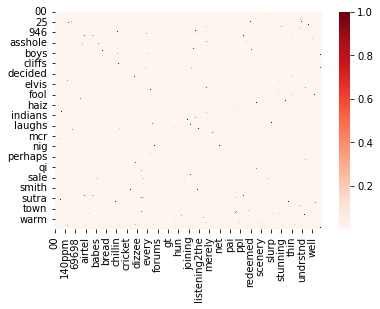

In [ ]:
# We give a heatmap plot of the above.
sns.heatmap(data=c, cmap='Reds')

In [ ]:
# We import the tree library.
from sklearn import tree

In [ ]:
# We will use a Decision tree classifier to do the modelling, so we create a variable containing this.
DT= tree.DecisionTreeClassifier(random_state=0)

In [ ]:
# We fit the model on the training set. 
DT_model=DT.fit(X_train,y_train)

In [ ]:
# We find the predictions of the model on the test set. 
y_test_pred = DT.predict(X_test)

In [ ]:
# We create a list of the most important features.
feature_importance_list = sorted(zip(DT.feature_importances_, X_train_feature_list), reverse=True)

In [ ]:
# We display the top 10 features
feature_importance_list[:10]

[(0.202387674249589, 'call'),
 (0.165099683622548, 'txt'),
 (0.06139710968874531, 'me'),
 (0.036273842015515506, 'free'),
 (0.03551498745243439, 'ill'),
 (0.024120459790081653, 'claim'),
 (0.021734917264765577, 'reply'),
 (0.0205288955369099, '86688'),
 (0.016847750205268165, 'im'),
 (0.016595309996272574, 'user')]

In [ ]:
# We display the worst 10 features
feature_importance_list[-10:]

[(0.0, '02070836089'),
 (0.0, '0207'),
 (0.0, '020603'),
 (0.0, '02'),
 (0.0, '0125698789'),
 (0.0, '01223585334'),
 (0.0, '01223585236'),
 (0.0, '0121'),
 (0.0, '0089my'),
 (0.0, '008704050406')]

In [ ]:
# We will create a Pandas series to visualize whichever features we want.
feature_imp = pd.Series(DT.feature_importances_, index = X_train_feature_list).sort_values(ascending=False)

top_feature = feature_imp.take([0,1,2,3,4,5,6,7,8,9,10])
worst_features = feature_imp.take([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1])

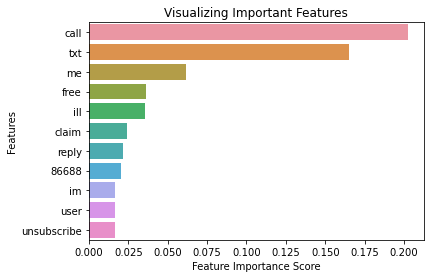

In [ ]:
# We display this information in a barplot
sns.barplot(x=top_feature, y=top_feature.index )

# These are the graph labels.
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

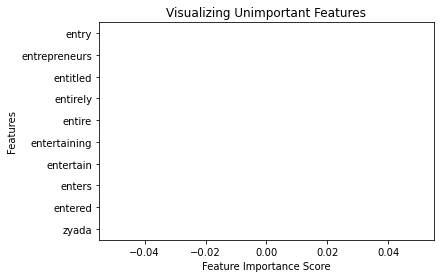

In [ ]:
# Same as the above.
sns.barplot(x=worst_features, y=worst_features.index )

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Unimportant Features")
plt.show()

In [ ]:
# To get a feel for how accurate our results are, we
# print the classification report measuring the predicted
# versus the actual values
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1448
           1       0.93      0.79      0.85       224

    accuracy                           0.96      1672
   macro avg       0.95      0.89      0.92      1672
weighted avg       0.96      0.96      0.96      1672



<function matplotlib.pyplot.show(close=None, block=None)>

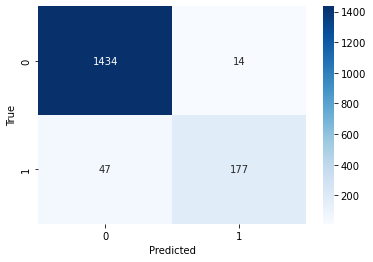

In [ ]:
# The above information is displayed in the confusion matrix,
# which we ceate and plot here.
cf_matrix = confusion_matrix(y_test, y_test_pred)

sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
# We will now run through the entire process again, but taking care to exclude stop words
# and also penalising words that show up to often or too infrequently.
count_vector2 = CountVectorizer(lowercase = True, max_df=0.75, min_df=10, max_features=20000, stop_words = "english")

In [ ]:
# We transform the data and display the resulting data frame.
X_train2 = count_vector2.fit_transform(text_train)
X_test2 = count_vector2.transform(text_test)
X_train_feature_list2 = count_vector2.get_feature_names()
df_vect2 = pd.DataFrame(data =X_train2.toarray(),columns = X_train_feature_list2)
display(df_vect2)

,08000839402,08000930705,10,100,1000,12,12hrs,150,150p,150pmsg,...,year,years,yes,yesterday,yo,youll,youre,youve,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# We construct the correlation matrix and print the different correlations.
c_2 = df_vect2.corr().abs()
s = c_2.unstack()
so = s.sort_values(kind="quicksort")
print(so)

sent      hope        1.833644e-17
hope      sent        1.833644e-17
really    did         1.827631e-05
did       really      1.827631e-05
lor       ready       2.180904e-05
                          ...     
princess  princess    1.000000e+00
price     price       1.000000e+00
pretty    pretty      1.000000e+00
really    really      1.000000e+00
yup       yup         1.000000e+00
Length: 349281, dtype: float64


In [ ]:
print(so[:9])

sent    hope      1.833644e-17
hope    sent      1.833644e-17
really  did       1.827631e-05
did     really    1.827631e-05
lor     ready     2.180904e-05
ready   lor       2.180904e-05
doing   right     2.259511e-05
right   doing     2.259511e-05
havent  going     2.430700e-05
dtype: float64


In [ ]:
print(so[348678:348688])

08000930705  camcorder      0.957304
camcorder    08000930705    0.957304
private      statement      0.957304
statement    private        0.957304
expires      unredeemed     0.957304
             identifier     0.957304
unredeemed   expires        0.957304
identifier   expires        0.957304
sae          await          0.970018
await        sae            0.970018
dtype: float64


<AxesSubplot:>

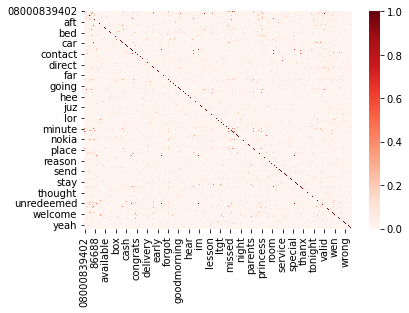

In [ ]:
sns.heatmap(data=c_2, cmap='Reds')

In [ ]:
# We construct a variable for the decision tree.
DT2= tree.DecisionTreeClassifier(random_state=0)

In [ ]:
# We fit the decision tree to the new training data.
DT_model2=DT2.fit(X_train2,y_train)

In [ ]:
# We make new predictions.
y_test_pred2 = DT2.predict(X_test2)

In [ ]:
# We create a new list of feature importances.
feature_importance_list2 = sorted(zip(DT2.feature_importances_, X_train_feature_list2), reverse=True)

In [ ]:
# The top 10 features
feature_importance_list2[:10]

[(0.15911419824593354, 'txt'),
 (0.10412444503968325, 'claim'),
 (0.07963541460282657, 'mobile'),
 (0.05068319410921545, 'service'),
 (0.04688076330852805, 'reply'),
 (0.037282497108681256, '18'),
 (0.035691313694019025, '500'),
 (0.026004785412095156, 'collection'),
 (0.022155020372859276, 'won'),
 (0.020504735613280572, 'rate')]

In [ ]:
# The worst 10 features
feature_importance_list2[-10:]

[(0.0, '2nd'),
 (0.0, '2000'),
 (0.0, '200'),
 (0.0, '1st'),
 (0.0, '150pmsg'),
 (0.0, '12hrs'),
 (0.0, '12'),
 (0.0, '1000'),
 (0.0, '08000930705'),
 (0.0, '08000839402')]

In [ ]:
# A Panda series for accessing all relevant features
feature_imp2 = pd.Series(DT2.feature_importances_, index = X_train_feature_list2).sort_values(ascending=False)

# The top 10 best and worst features (i.e. most and least common words)
top_features2 = feature_imp2.take([0,1,2,3,4,5,6,7,8,9,10])
worst_features2 = feature_imp2.take([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1])

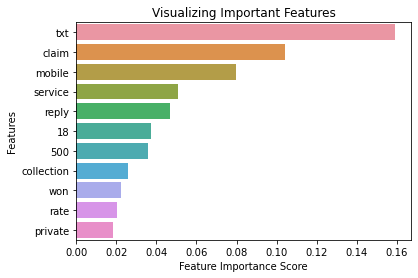

In [ ]:
# Creating a barplot of the important features
sns.barplot(x=top_features2, y=top_features2.index )

# Labels for the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

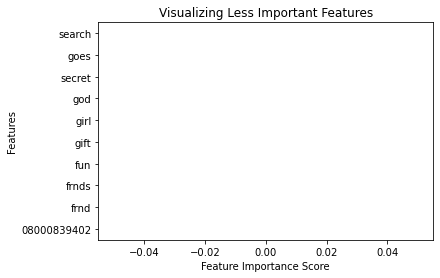

In [ ]:
# Same for the worst features.
sns.barplot(x=worst_features2, y=worst_features2.index )

# Labels for the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Less Important Features")
plt.show()

In [ ]:
# The new classification report. We have decreased the precision, 
# but slightly increased the recall of the minority class. It's hard to 
# tell if this is really an improvement. 
print(classification_report(y_test, y_test_pred2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1448
           1       0.81      0.81      0.81       224

    accuracy                           0.95      1672
   macro avg       0.89      0.89      0.89      1672
weighted avg       0.95      0.95      0.95      1672



<function matplotlib.pyplot.show(close=None, block=None)>

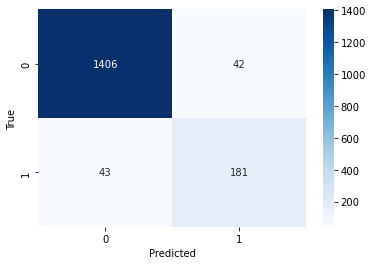

In [ ]:
# We create and plot the new confusion matrix.
cf_matrix2 = confusion_matrix(y_test, y_test_pred2)

sns.heatmap(cf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
# We will now repeat the same steps again, but with normalisation. In particular we will use TfidfVectorizer 
# rather than just CountVectorizor. 

In [ ]:
# We import the relevant vectorisor
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS

In [ ]:
# We create a variable for the vectorizer.
vectorizer_Tfidf = TfidfVectorizer(lowercase=True, ngram_range=(1,1), max_df=0.75, min_df=10, max_features=20000, stop_words='english')

In [ ]:
# We transform the data again using the new vectorizer and display 
# the corresponding data frame.
X_train_Tfidf = vectorizer_Tfidf.fit_transform(text_train)
X_test_Tfidf = vectorizer_Tfidf.transform(text_test)
X_train_feature_list_Tfidf = vectorizer_Tfidf.get_feature_names()
df_vect_Tfidf = pd.DataFrame(data = X_train_Tfidf.toarray(),columns = X_train_feature_list_Tfidf)
display(df_vect_Tfidf)

,08000839402,08000930705,10,100,1000,12,12hrs,150,150p,150pmsg,...,year,years,yes,yesterday,yo,youll,youre,youve,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Here we define the training model and fit it on the training data.
DT_Tfidf = tree.DecisionTreeClassifier(random_state=0)
DT_model_Tfidf = DT_Tfidf.fit(X_train_Tfidf, y_train)

In [ ]:
# We make the model's predictions for the test data
y_test_pred_Tfidf = DT_Tfidf.predict(X_test_Tfidf)

In [ ]:
# A new list of feature importances. 
feature_importance_list_Tfidf = sorted(zip(DT_Tfidf.feature_importances_, X_train_feature_list_Tfidf), reverse=True)

In [ ]:
# We make a new panda series for the above and create top and worst features.
feature_imp_Tfidf = pd.Series(DT_Tfidf.feature_importances_, index = X_train_feature_list_Tfidf).sort_values(ascending=False)

top_feature_Tfidf = feature_imp_Tfidf.take([0,1,2,3,4,5,6,7,8,9,10])
worst_features_Tfidf = feature_imp_Tfidf.take([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1])

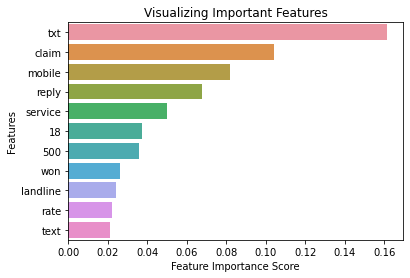

In [ ]:
# We plot the new top features again.
sns.barplot(x=top_feature_Tfidf, y=top_feature_Tfidf.index )

# labels for the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

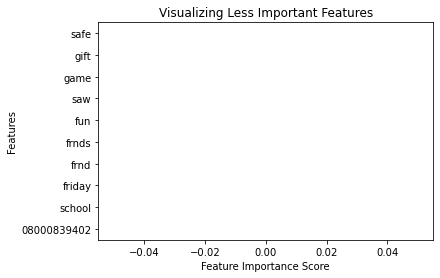

In [ ]:
# The worst features.
sns.barplot(x=worst_features_Tfidf, y=worst_features_Tfidf.index )

# Graph labels.
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Less Important Features")
plt.show()

In [ ]:
# The classification report again. The results here are slightly better, in that we have not lost
# as much precision in the minority class. The recall is also slightly better than for the
# the 1st (non-preprocessed version).
print(classification_report(y_test, y_test_pred_Tfidf))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1448
           1       0.88      0.81      0.84       224

    accuracy                           0.96      1672
   macro avg       0.92      0.90      0.91      1672
weighted avg       0.96      0.96      0.96      1672



<function matplotlib.pyplot.show(close=None, block=None)>

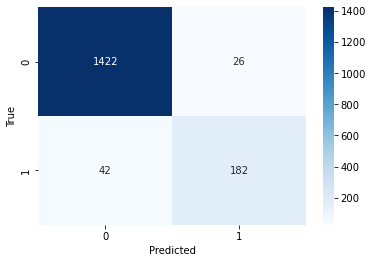

In [ ]:
#create the confusion matrix
cf_matrix_Tfidf = confusion_matrix(y_test, y_test_pred_Tfidf)

#plot the confusion matrix
sns.heatmap(cf_matrix_Tfidf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
# The co-correspondence matrix and the different correlations again.
c_Tfidf = df_vect_Tfidf.corr().abs()
s_Tfidf = c_Tfidf.unstack()
so_Tfidf = s.sort_values(kind="quicksort")
print(so)

sent      hope        1.833644e-17
hope      sent        1.833644e-17
really    did         1.827631e-05
did       really      1.827631e-05
lor       ready       2.180904e-05
                          ...     
princess  princess    1.000000e+00
price     price       1.000000e+00
pretty    pretty      1.000000e+00
really    really      1.000000e+00
yup       yup         1.000000e+00
Length: 349281, dtype: float64


<AxesSubplot:>

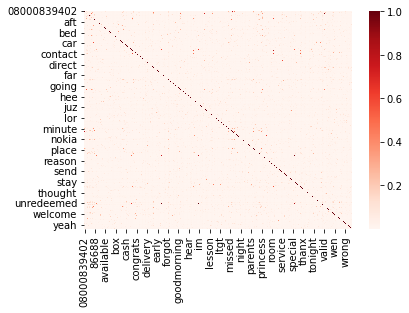

In [ ]:
# Another plot of the heat map.
sns.heatmap(data=c_Tfidf, cmap='Reds')

In [ ]:
# The same vectoriser as before, but with a modified ngram_range (i.e. we will now deal with 2-grams)
vectorizer_Tfidf2 = TfidfVectorizer(lowercase=True, ngram_range=(1,2), max_df=0.75, min_df=10, max_features=20000, stop_words='english')

In [ ]:
# We will now do all the same things as before, but with n-grams
X_train_Tfidf2 = vectorizer_Tfidf2.fit_transform(text_train)
X_test_Tfidf2 = vectorizer_Tfidf2.transform(text_test)
X_train_feature_list_Tfidf2 = vectorizer_Tfidf2.get_feature_names()
df_vect_Tfidf2 = pd.DataFrame(data = X_train_Tfidf2.toarray(),columns = X_train_feature_list_Tfidf2)
df_vect_Tfidf2

,08000839402,08000930705,10,100,1000,1000 cash,12,12hrs,150,150p,...,year,years,yes,yesterday,yo,youll,youre,youve,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3898,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Here we define the training model and fit it on the training data.
DT_Tfidf2 = tree.DecisionTreeClassifier(random_state=0)
DT_model_Tfidf2 = DT_Tfidf2.fit(X_train_Tfidf2, y_train)

In [ ]:
#Make the model's predictions for the test data
y_test_pred_Tfidf2 = DT_Tfidf2.predict(X_test_Tfidf2)

In [ ]:
feature_importance_list_Tfidf2 = sorted(zip(DT_Tfidf.feature_importances_, X_train_feature_list_Tfidf), reverse=True)

In [ ]:
feature_imp_Tfidf2 = pd.Series(DT_Tfidf2.feature_importances_, index = X_train_feature_list_Tfidf2).sort_values(ascending=False)

top_feature_Tfidf2 = feature_imp_Tfidf2.take([0,1,2,3,4,5,6,7,8,9,10])
worst_features_Tfidf2 = feature_imp_Tfidf2.take([-10,-9,-8,-7,-6,-5,-4,-3,-2,-1])

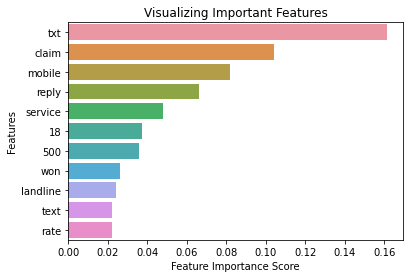

In [ ]:
sns.barplot(x=top_feature_Tfidf2, y=top_feature_Tfidf2.index )

# labels for the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

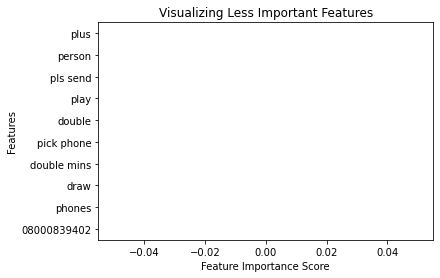

In [ ]:
sns.barplot(x=worst_features_Tfidf2, y=worst_features_Tfidf2.index )

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Less Important Features")
plt.show()

In [ ]:
# 2-grams seem to be a slight improvement over 1-grams in the minority class,
#and have not changed any of the scores in the majority class
print(classification_report(y_test, y_test_pred_Tfidf2))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1448
           1       0.88      0.83      0.86       224

    accuracy                           0.96      1672
   macro avg       0.93      0.91      0.92      1672
weighted avg       0.96      0.96      0.96      1672



<function matplotlib.pyplot.show(close=None, block=None)>

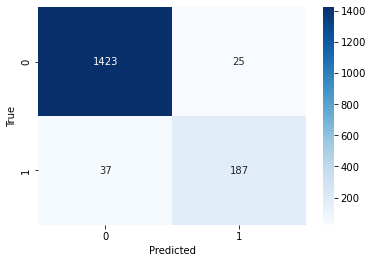

In [ ]:
# We create and display the confusion matrix
cf_matrix_Tfidf2 = confusion_matrix(y_test, y_test_pred_Tfidf2)

sns.heatmap(cf_matrix_Tfidf2, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show

In [ ]:
c_Tfidf2 = df_vect_Tfidf2.corr().abs()
s_Tfidf2 = c_Tfidf2.unstack()
so_Tfidf2 = s.sort_values(kind="quicksort")
print(so)

sent      hope        1.833644e-17
hope      sent        1.833644e-17
really    did         1.827631e-05
did       really      1.827631e-05
lor       ready       2.180904e-05
                          ...     
princess  princess    1.000000e+00
price     price       1.000000e+00
pretty    pretty      1.000000e+00
really    really      1.000000e+00
yup       yup         1.000000e+00
Length: 349281, dtype: float64


In [ ]:
sns.heatmap(data=c_Tfidf2, cmap='Reds')